# Deep Learning - Assignment 1




## Outline (<span style="color:red">15 points</span>)
#### About the laboratory exercises
The laboratory exercises in computer room are for providing an environment doing the assignments and project，except the first exercise that will also contain a pytorch tutorial, explaining how to install python, pytorch on your own computer, or how to use them in the computer room. 

Extra information about access to pytorch environment can be found in the FAQ section in [https://moodle.oulu.fi/mod/page/view.php?id=73734](https://moodle.oulu.fi/mod/page/view.php?id=73734).

We will give at least 2 weeks for each assignment and more for the final project. So it happens that the new assignment is published while the deadline of the previous assignment is not reached. Good luck. 

#### In this assignment, you will learn:
* How to generate random data using python.
* Building linear models for simple regression problem on the generated data.
* Training the linear models with gradient descent algorithm.
* How to alleviate over-fitting for your model.
* **Concepts** you will learn: ***Regularization***, ***Model selection***, ***Gradient descent***, ***Over-fitting***, ***Weight decay***, ***Training/Validation/Testing***.

#### Tasks
In this assignment, we are going to solve a basic linear regression problem by fitting a polynomial function, which we shall use as a running example to motivate a number of key concepts mentioned above. 
* **Part 1.** Generate training and testing data using python.
* **Part 2.** Linear regression with polynomials without regularization. 
* **Part 3.** Linear regression with polynomials with regularization.

#### Environment
Python 3.<br>
Other libraries should be installed correctly such as numpy, matplotlib, *etc*., according to the dependencies of the assignment. 

#### Database
* Randomly synthesized data.

## Part 1. Generate training and testing data using python
Suppose we observe a real-valued input variable $x$ and we wish to use this observation to predict the value of a real-valued target variable $y$. For the present purposes, it is instructive to consider an artificial example using synthetically generated data because we then know the precise process that generated the data for comparison against any learned model.

We therefore generate our training data which consists of 10 pairs of $\{x_i, y_i\}$ where $\{x_i\}$ are generated uniformly in range (0, 1), and the corresponding target values $\{y_i\}$ are obtained by first computing the corresponding values of the function $sin(2\pi x)$ and then adding random noise with a Gaussian distribution having standard deviation 0.3.
\begin{align*}
y_i = sin(2\pi x_i) + \varepsilon, \varepsilon\sim \mathcal{N}(0,\,0.3^{2}).
\end{align*}

The testing data is created in the same way as the creation of training data but the number of pairs is 100, thus to give a more complete evaluation of the model to be trained. 

Please create the required training and testing data below and plot them. You could use numpy to create the data and matplotlib.pyplot to show them. 

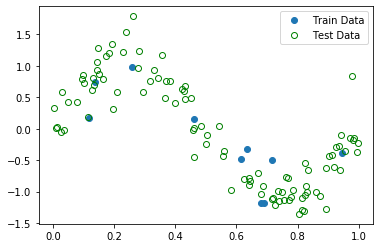

In [83]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 

x_train = np.random.rand(10, 1)
y_train = np.sin(2 * np.pi * x_train) + np.random.normal(0, 0.3, (10, 1))

# your code here
x_test = np.random.rand(100, 1)
y_test = np.sin(2 * np.pi * x_test) + np.random.normal(0, 0.3, (100, 1))

plt.plot(x_train, y_train, marker='o', linestyle='none',label='Train Data') 
plt.plot(x_test, y_test, fillstyle='none', marker='o', color='g', linestyle='none',label='Test Data') 
plt.legend(loc='upper right')
plt.show()

--------------------<span style="color:red">1 point</span>--------------------

## Part 2. Linear regression with polynomials without regularization
Congratulations if you generate the data correctly! However, to make sure all of you use the same data, we have generated it in advance. 

In [3]:
import pickle
with open('data/rawdata.pickle', 'rb') as f:
    data = pickle.load(f)
    
x_train = data['x_train']
y_train = data['y_train']

x_test = data['x_test']
y_test = data['y_test']

The task in this part is to train a linear model to fit the curve on the training data. Now that we have $\{x, y\}$, we consider using a polynomial function of the form 
\begin{align}
f(x, \pmb{w}) = \omega_0 + \omega_1x + \omega_2x^2 + ... + \omega_Mx^M = \sum_{j=0}^{M}\omega_jx^j,
\tag{1}
\end{align}
where $M$ is the *order* of the polynomial, and $x^j$ denotes $x$ raised to the power of j. The values of the coefficients will be determined by fitting the polynomial to the training data. To do so, we introduce the error function to be minimized:
\begin{equation}
E(\pmb{w}) = \frac{1}{2}\sum_{i=1}^{N}\{f(x_i, \pmb{w}) - y_i\}^2,
\tag{2}
\end{equation}
where, $N$ is 10 in our case.

First of all, to use matrix operation in this case, we re-write the polynomial function (1) in the form of matrix multiplication:
$$
\begin{bmatrix} 
f(x_1, \pmb{w}) \\ f(x_2, \pmb{w}) \\ . \\ . \\ . \\ f(x_N, \pmb{w})
\end{bmatrix} 
=
\begin{bmatrix} 
1 & x_1 & x_1^2 & . & . & . & x_1^M \\ 1 & x_2 & x_2^2 & . & . & . & x_2^M \\ . & . & . & . & . & . & . \\ . & . & . & . & . & . & . \\ . & . & . & . & . & . & . \\ 1 & x_N & x_N^2 & . & . & . & x_N^M
\end{bmatrix} 
\begin{bmatrix} 
\omega_0 \\ \omega_1 \\ . \\ . \\ . \\ \omega_M
\end{bmatrix}
$$
We call the first matrix on the right hand side feature matrix. We next build the feature matrix and try to solve above minimization problem using [`Gradient Descent Algorithm`](https://towardsdatascience.com/an-introduction-to-gradient-descent-c9cca5739307) and the closed-form analytical solution. Because the result from the closed-form solution is theoretically global-optimal for the problem, by doing this, we could know how well our gradient descent algorithm performs by comparing its results with the global optimal. 

Anyway, I'll give an guidance using $M=3$ as following.

### Part 2.1. Method based on closed-form analysis
First, let's quickly solve this using the closed-form analytical solution. In this case, we luckily have this solution to solve the polynomial regression problem. However, in practical problems using deep learning models, which are non-linear and often very complex, there doesn't exist a closed-form solution or extremely difficult to find the solution analytically, the most common way is using gradient descent algorithm. 

In our case, we will first solve the regression problem using closed-form analysis to get the optimal solution, which can also be seen as the upper bound the gradient descent algorithm goes (because gradient descent algorithm will alwayse find an approximate solution which is close to the optimal).

First, we calculate the feature matrix based on the matrix formulation and apply [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to solve the regression problem.

In [4]:
feature_matrix = np.ones_like(x_train)
M = 3
for i in range(1, M+1):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)
    
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False).fit(feature_matrix, y_train)

Then, show the original training data points and the draw the curve of the function obtained on a single figure. 

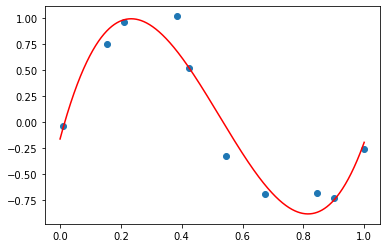

In [5]:
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)
for i in range(1, M+1):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

y_curve = model.predict(features_curve)
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_curve, 'r')
plt.show()

Now, we have got all the coefficients (noted as $\pmb{w}^*$) of the polynomial function by minimizing the error function (2). Therefore, we can evaluate the residual value of $E(\pmb{w}^*)$ given by (2) for the training and testing data. However, it is sometimes more convenient to use the *root-mean-square* (RMS) error defined by 
$$
E_{RMS} = \sqrt{2E(\pmb{w}^*)/N}
\tag{3}
$$
in which the division by $N$ allows us to compare different sizes of data sets on an equal footing, also with the same scale (and in the same units) as the target variable $y$. 

In order to evaluate the polynomial function we obtained, we do the following:
* Calculate and print the RMS error on training data based on equation (3),
* Calculate and print the RMS error on testing data based on equation (3),
* Get and print the coefficients of the trained function $\omega_0$ ~ $\omega_M$ using [`LinearRegression.coef_`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [6]:
prediction_train = model.predict(feature_matrix)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

feature_matrix_test = np.ones_like(x_test)
for i in range(1, M+1):
    feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)
    
prediction_test = model.predict(feature_matrix_test)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

print('rms error on training data: ', rms_train)
print('rms error on testing data: ', rms_test)
print('coefficients of the trained function: ', model.coef_)

rms error on training data:  0.16066897173745565
rms error on testing data:  0.30943910311337264
coefficients of the trained function:  [[ -0.16311694  10.9380811  -30.08577056  19.11555865]]


### Part 2.2. Method based on Gradient Descent Algorithm
Once we get the closed-form solution, which is also the optimal solution, the next thing we are supposed to do is to re-solve the problem by gradient descent algorithm, because gradient descent matters a lot in practical applications since we cannot have a closed-form solution for most of the practical problems. Generally, the ingredients make up a gradient descent algorithm are:
* defining the learning rate to update our parameters,
* defining a loss function or objective function which you should minimize (here we use the error function based on equation (2)),
* calculating the gradients of parameters w.r.t. the loss,
* update parameters according to the learning rate and gradients to a direction that makes the loss smaller.

So, let's do this in that way.

In [7]:
# defining a learning rate, you could change it
learning_rate = 0.1

# initialize the parameters, here we simply assign each parameter to 1
# becuase M=3, so we totally have 4 parameters (w0, w1, w2, w3)
W = np.ones((M+1, 1))

# calculate the feature matrix as before, in order to compute the loss
feature_matrix = np.ones_like(x_train)
for i in range(1, 4):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)

# iteratively do gradient descent, here we just iterate it 50 times
for i in range(50):
    # calculate the values of the polynomial function
    F = np.matmul(feature_matrix, W)

    # calculate the loss, print it every 10 iterations
    if i % 10 ==0:
        loss = 0.5 * np.sum((F - y_train) ** 2)
        print('loss: ', loss)

    # calcualte the gradients of the parameters
    # here we have 10 data samples, so we calculate the mean.
    # please understand this formulation by inferencing the gradients
    # on your own with what you learnt in undergraduate school.
    G = np.mean((F - y_train) * feature_matrix, axis=0).reshape(-1, 1)

    # update parameters to a direction that makes the loss smaller
    # so we use '-' here, it is also why we call gradient "descent"
    W = W - learning_rate * G

loss:  34.380066478803926
loss:  4.012740605942455
loss:  2.436307391471592
loss:  1.958278267953077
loss:  1.6626874106866916


Again, we show the original training data points and the draw the curve of the function obtained on a single figure. 

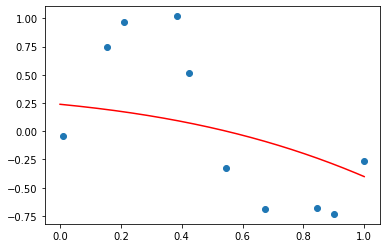

In [17]:
# your code here

x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)
for i in range(1, M+1):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

y_curve = np.matmul(features_curve, W)
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_curve, 'r')
plt.show()

--------------------<span style="color:red">2 points</span>--------------------<br>
Also, in order to evaluate the polynomial function we obtained, we do the following:
* Calculate and print the RMS error on training data based on equation (3),
* Calculate and print the RMS error on testing data based on equation (3),
* Print the coefficients (parameters).

In [21]:
# your code here
prediction_train = np.matmul(feature_matrix, W)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

feature_matrix_test = np.ones_like(x_test)

for i in range(1, M+1):
    feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)

prediction_test = np.matmul(feature_matrix_test, W)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

coeff = W.reshape(1,-1)

print('rms error on training data: ',rms_train )
print('rms error on testing data: ',rms_test )
print('coefficients of the trained function: ',coeff)

rms error on training data:  0.5422276467732126
rms error on testing data:  0.5918422558573816
coefficients of the trained function:  [[ 0.23861297 -0.26124322 -0.24765614 -0.13137266]]


--------------------<span style="color:red">3 points</span>--------------------<br>

#### Question 1. What's the difference between closed-form method and gradient descent method?  

#### Your answer:

**Closed-form method** is a procedure to solve the model parameters analytically, which works better in small dataset. It is accurate.

**Gradient descent method** is a procedure to estimate optimal parameters of function, which works better in big dataset.

--------------------<span style="color:red">3.5 points</span>--------------------<br>

### Part 2.3. Model selection with closed-form solution
There remains the problem of choosing the order $M$ of the polynomial, this is actually an example of the concept *model selection*. To see how changing $M$ affects the regression problem being solved, please change $M=$ from 1 to 9, and get the following objectives based on **closed-form analysis**:
* Draw all the 9 figures as done above (make sure the function curve and training data points are in the same figure for each case, using plt.subplots),
* Calculate all the error values using equation (3) with respect to trainig and testing data for all the 9 cases, and plot this values on a single figure (that means 18 points would be drawn in the figure, with x axis representing $M$ and y axis representing the error value, please use two colors to distinguish training and testing),
* Print the coefficients for the 9 polynomial functions. 


 Results when M = 1
rms error on training / testing data: 0.478388 / 0.654822
coefficients of the trained function:  [[ 0.79454616 -1.44141789]]

 Results when M = 2
rms error on training / testing data: 0.461018 / 0.553398
coefficients of the trained function:  [[ 0.55537648  0.06117962 -1.45333078]]

 Results when M = 3
rms error on training / testing data: 0.160669 / 0.738643
coefficients of the trained function:  [[ -0.16311694  10.9380811  -30.08577056  19.11555865]]

 Results when M = 4
rms error on training / testing data: 0.159394 / 0.744796
coefficients of the trained function:  [[ -0.18940812  11.75740862 -34.07877995  25.43571362  -3.14449788]]

 Results when M = 5
rms error on training / testing data: 0.112024 / 0.694376
coefficients of the trained function:  [[-7.92998629e-02  3.70865622e+00  3.12971770e+01 -1.56475755e+02
   2.02270285e+02 -8.10183758e+01]]

 Results when M = 6
rms error on training / testing data: 0.071934 / 0.657282
coefficients of the trained function

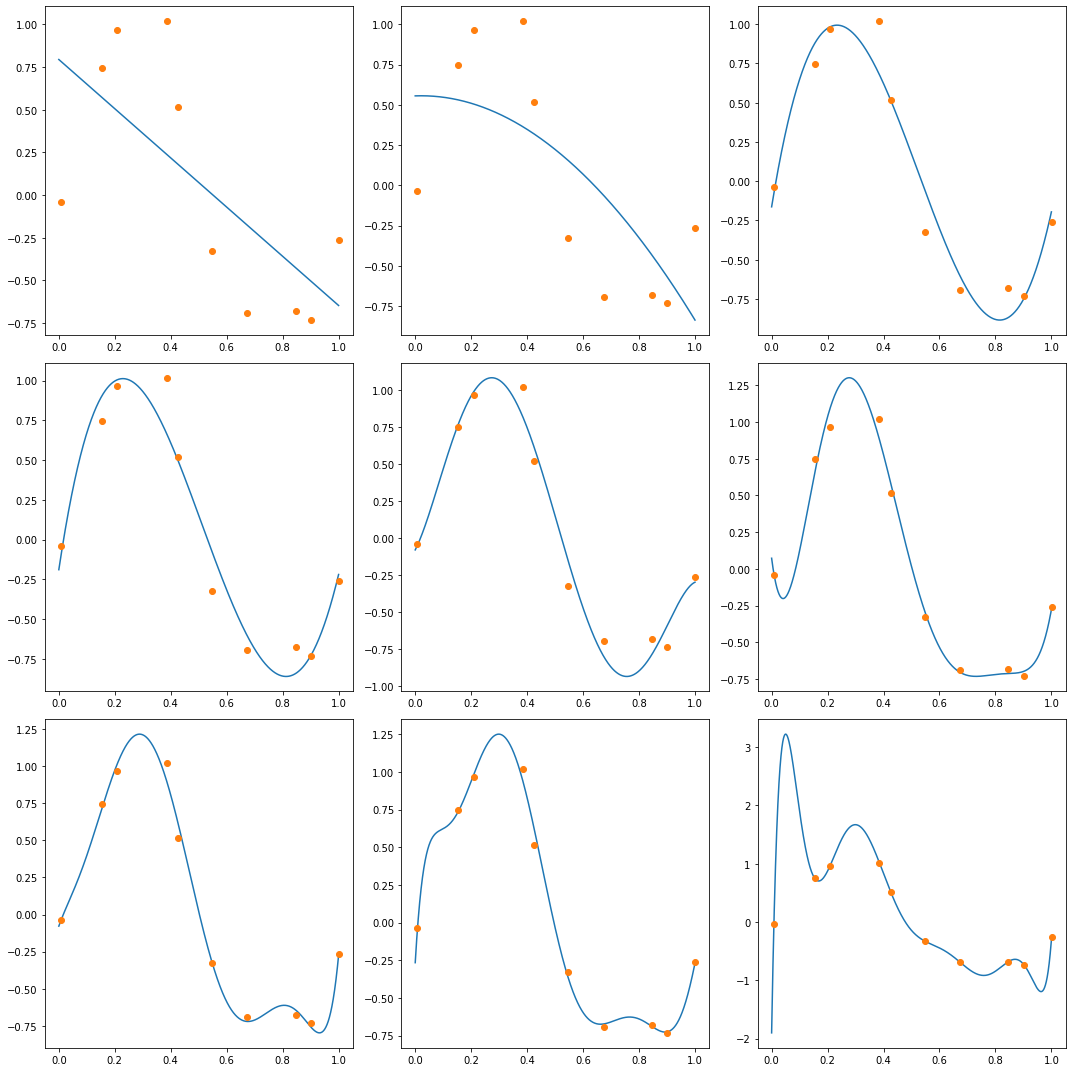

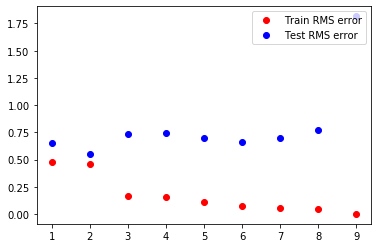

In [38]:
# your code here
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Define Feature matrix, X-curve and test matrix
feature_matrix_Model = np.ones_like(x_train)
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)

feature_matrix_test = np.ones_like(x_test)

# Define list to store train rms and test rms
train_rms = []
test_rms = []

for M in range(1, 10):
    
    # Define matrix and model along with M value 
    feature_matrix_Model = np.concatenate((feature_matrix_Model, x_train ** M), axis=1)
    model = LinearRegression(fit_intercept=False).fit(feature_matrix_Model, y_train)
    features_curve = np.concatenate((features_curve, x_curve ** M), axis=1)
    
    # Define feature test matrix    
    feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)
    
    # Use model to calculate y_curve
    y_curve = model.predict(features_curve)
    
    # Plot all curves and dots
    ax[(M-1)//3][(M-1)%3].plot(x_curve, y_curve)
    ax[(M-1)//3][(M-1)%3].plot(x_train, y_train, marker='o', linestyle='None') 
    

    
    # Calculate rms for train and test data
    prediction_train = model.predict(feature_matrix_Model)
    rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))
    
    prediction_test = model.predict(feature_matrix_test)
    rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))
    
    # Record rms value
    train_rms.append(rms_train)
    test_rms.append(rms_test)
    
    print('\n Results when M = %d' % M)
    print('rms error on training / testing data: %f / %f' % (rms_train, rms_test))
    print('coefficients of the trained function: ', model.coef_)

fig.tight_layout()
plt.show()

M_x = np.linspace(1, 9, 9)
# draw the 18 points here
plt.plot(M_x, train_rms, 'ro',label='Train RMS error')
plt.plot(M_x, test_rms, 'bo',label='Test RMS error')
plt.legend(loc='upper right')

--------------------<span style="color:red">5.5 points</span>--------------------<br>

In fact, when $M = 9$, the 10 training points would be exactly fitted, and the training loss becomes zero, since the degree of freedom for this regression problem is 10. However, the fitted curve oscillates wildly and gives a very poor representation of the function $sin(2\pi x)$. This behavior is known as **over-fitting**. 
#### Question 2. Which M is the best one for this probelm and why? Why the over-fitting happens when $M$ is big?

#### Your answer:


**2** is the best value for $M$. When $M$ is 2, we can get smallest rms error for test sets than other value.

When $M$ is bigger, the polynomial function is more and more suitable for training sets which is unable to reflect the universality of data.

--------------------<span style="color:red">6.5 points</span>--------------------<br>

### Part 2.4. Gradient descent practice
Set $M=9$, based on **gradient descent algorithm**, do the following (During training, print the loss every $n$ iterations to show you are running the gradient descent algorithm to train the model, you could select a $n$ as you like):
* Change learning rate and see how fast the training converges,
* Change number of iteration to see whether the training loss would be smaller,
* Draw the figure as done above when you feel the training is good enough (make sure the function curve and training data points are in the same figure),
* Calculate and print the error values using equation (3) with respect to trainig and testing data,
* Print the coefficients (parameters) for the polynomial function. 

In [58]:
# your code here
# defining a learning rate
learning_rate = 0.80


# initialize the parameters
M = 9
W = np.ones((M+1, 1))

# calculate the feature matrix as before, in order to compute the loss
feature_matrix = np.ones_like(x_train)
for i in range(1, M+1):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)

# iteratively do gradient descent
iterations = 100
for i in range(iterations):
    
    # calculate the values of the polynomial function
    F = np.matmul(feature_matrix, W)

    # calculate the loss and print it
    if i % 10 ==0:
        loss = 0.5 * np.sum((F - y_train) ** 2)
        print('loss: ', loss)
        
    # calcualte the gradients of the parameters
    G = np.mean((F - y_train) * feature_matrix, axis=0).reshape(-1, 1)

    # update parameters to a direction that makes the loss smaller
    W = W - learning_rate * G

loss:  108.9576867114645
loss:  1.3277842162748286
loss:  0.9356622923098687
loss:  0.8633900656938968
loss:  0.8213955911783352
loss:  0.7940135285020612
loss:  0.7740305795276011
loss:  0.7579693551248701
loss:  0.7441417749268406
loss:  0.7317178277101527


Draw the figure 

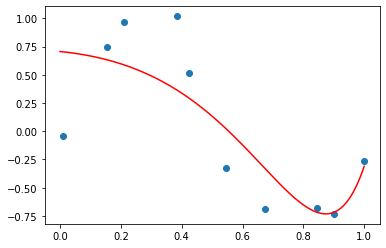

In [59]:
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)
for i in range(1, M+1):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

y_curve = np.matmul(features_curve, W)
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_curve, 'r')
plt.show()

In [60]:
prediction_train = np.matmul(feature_matrix, W)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

feature_matrix_test = np.ones_like(x_test)

for i in range(1, M+1):
    feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)

prediction_test = np.matmul(feature_matrix_test, W)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

coeff = W.reshape(1,-1)

print('rms error on training data: ',rms_train )
print('rms error on testing data: ',rms_test )
print('coefficients of the trained function: ',coeff)

rms error on training data:  0.37954700678755726
rms error on testing data:  0.4004883084519169
coefficients of the trained function:  [[ 0.70587409 -0.26760124 -1.17617027 -0.94815637 -0.52156432 -0.12875747
   0.18808766  0.43479006  0.62635021  0.77666943]]


--------------------<span style="color:red">7.5 points</span>--------------------<br>

#### Question 3. Actually, when using gradient descent algorithm, even in the case that $M=9$, it is hard to observe the over-fitting phenomenon. It is because it's difficult to reach the theoretically optimal solution that makes the training loss zero. Regardless of over-fitting, please give your idea to make the training loss smaller when using gradient descent algorithm in this case.

#### Your answer:

A suitable learning rate and bigger iterations will help us to get a better value. Multiple iterations can always help us close to the local optimal value, but we still need to consider about time consuming. 

--------------------<span style="color:red">8 points</span>--------------------<br>

## Part 3. Linear regression with polynomials with regularization
Before introducing regularization, let's think about a way to solve the over-fitting problem. <br>
Definitely, through the experiments done above, you somewhat have found that the most direct way is reducing $M$. However, what if we use more training data? 

### Part 3.1. Re-visit polynomial regression with extra training data and $M=9$
Finish this step as in Part 2.1 based on closed-form analysis. (*note*: please calculate the RMS error on the original training and testing data)

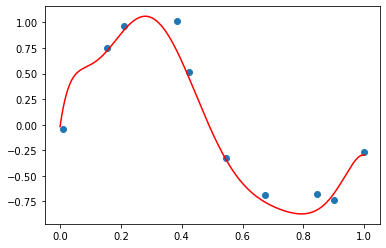

In [50]:
with open('data/extradata.pickle', 'rb') as f:
    extra_data = pickle.load(f)
    
x_extra = extra_data['x_extra']
y_extra = extra_data['y_extra']

x_extra_train = np.concatenate((x_train, x_extra), axis=0)
y_extra_train = np.concatenate((y_train, y_extra), axis=0)

# your code here
feature_matrix = np.ones_like(x_extra_train)
M = 9
for i in range(1, M+1):
    feature_matrix = np.concatenate((feature_matrix, x_extra_train ** i), axis=1)
    
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False).fit(feature_matrix, y_extra_train)

x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)
for i in range(1, M+1):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

y_curve = model.predict(features_curve)
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_curve, 'r')
plt.show()

In [52]:
# In order to use original data, we redefine feature matrix
# your code here
feature_matrix = np.ones_like(x_train)
M = 9
for i in range(1, M+1):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)


prediction_train = model.predict(feature_matrix)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

feature_matrix_test = np.ones_like(x_test)
for i in range(1, M+1):
    feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)
    
prediction_test = model.predict(feature_matrix_test)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

print('rms error on training data: ', rms_train)
print('rms error on testing data: ', rms_test)
print('coefficients of the trained function: ', model.coef_)

rms error on training data:  0.12703545085564324
rms error on testing data:  0.29462627148498843
coefficients of the trained function:  [[-1.83865514e-02  2.07504406e+01 -3.11916156e+02  2.43682755e+03
  -9.77774964e+03  2.15345964e+04 -2.71503685e+04  1.93217142e+04
  -7.04728868e+03  9.73155968e+02]]


--------------------<span style="color:red">9 points</span>--------------------<br>

#### Question 4. Does introducing more training data in this case alleviate over-fitting? Why? 

#### Your answer:


Yes. More training data can help parameters in model become more universal, which can find distribution of data set instead of the function of several data points.

--------------------<span style="color:red">10 points</span>--------------------<br>

### Part 3.2. Re-visit polynomial regression with regularization and $M=9$
We may alleviate the over-fitting problem through introducing more training data, but what if there is no extra training data? In fact, we donnot want to limit the number of parameters in a model according to the size of the available training set, because it also limits the capacity and flexibility of the model. One technique that is often used to control over the over-fitting phenomenon in such cases is that of **regularization**, which involves adding a penalty term to the error function (2) in order to discourage the coefficients from reaching large values. The simplest such penalty term takes the form of a sum of squares of all of the coefficients, leading to a modified error function:
$$
\widetilde{E}(\pmb{w})=\frac{1}{2}\sum_{i=1}^{N}\{f(x_i, \pmb{w}) - y_i\}^2 + \frac{\lambda}{2}||\pmb{w}||^2
\tag{4}
$$
where $||\pmb{w}||^2\equiv \pmb{w}^T\pmb{w} = \omega_0^2 + \omega_1^2 + ... + \omega_M^2$, and the coefficient $\lambda$ governs the relative importance of the regularization term compared with the sum-of-squares error term. 

Again, this error function can be minimized exactly in closed form. The regression with such a quadratic regularizer is called *ridge regression*. In the context of neural networks, this approcah is known as **weight decay**. 

Apart from training and testing data, we also need another data set to test how suitable the $\lambda$ is before we use the model on the testing data. We call this data set **validation** set. Usually, when we have large amount of training data, we create a validation set splitted from the original training data and use the rest of the training data as the new training data. In our case, we only have the training data consisting of 10 data points, so here we use the extra data on Part 3.1 as the validation data. 

Please solve the ridge regression problem with the polynomial function using **training** data in the following 7 conditions:
* $M=9$, $ln\lambda=-35$ ($\lambda=e^{-35}$)
* $M=9$, $ln\lambda=-25$
* $M=9$, $ln\lambda=-20$
* $M=9$, $ln\lambda=-15$
* $M=9$, $ln\lambda=-10$
* $M=9$, $ln\lambda=-5$
* $M=9$, $ln\lambda=0$

with the following tasks:
1. Calculate the root-mean-square error based on (3) (not the modified one) on the **training** and **validation** set. Plot the curves of RMS error versus $\ln\lambda$ for training and validation set in a single figure (i.e., in this figure, two curves will be plotted, one for training data and one for validation data. x axis represents the value of $\ln\lambda$ and y axis represents RMS error). 
2. Print the coefficients for the obtained 7 ploynomial functions.
3. Find the best value for $\lambda$ among these conditions (`best` means its corresponding RMS on the **validation** set is the smallest), calculate the corresponding RMS error on **testing** data and print it.
4. Draw the curve of the polynomial function in a figure w.r.t the best $\lambda$, in which the 10 original training data points and the 100 testing data points should also be plotted using different colors. 

To sovle the ridge regression problem, we could use [`sklearn.linear_model.Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).

D:\Anaconda\envs\Pytorch\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.29901e-17): result may not be accurate.
  overwrite_a=True).T



 Results when M = 9
coefficients of the trained function:  [[ 0.00000000e+00  2.62669798e+02 -4.75138491e+03  3.74560021e+04
  -1.58510510e+05  3.93897714e+05 -5.93671433e+05  5.34311645e+05
  -2.64271204e+05  5.52780711e+04]]

 Results when M = 9
coefficients of the trained function:  [[    0.            20.07065865  -252.37411466  1730.90650336
  -5679.00697823  8582.01466036 -4008.73337558 -3954.32501056
   5212.66866226 -1651.30552846]]

 Results when M = 9
coefficients of the trained function:  [[   0.           -1.46601824   64.87474838 -143.23508048 -216.52326147
   708.39671241 -204.55836409 -555.80728692  370.06643335  -21.99479849]]

 Results when M = 9
coefficients of the trained function:  [[ 0.00000000e+00 -1.39071774e-01  6.07663854e+01 -1.95044523e+02
   8.50102258e+01  1.64055702e+02  1.31655000e+01 -1.37952257e+02
  -1.18308383e+02  1.28214585e+02]]

 Results when M = 9
coefficients of the trained function:  [[  0.           8.640415   -13.62825189 -12.38717992   7.40

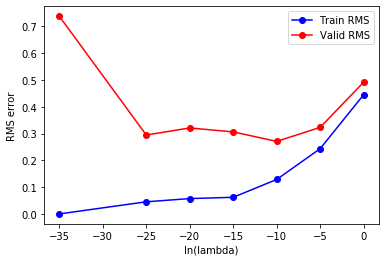

[0.7366696958297577, 0.29447906554193143, 0.3207108124061178, 0.30609240562236495, 0.2707157896789365, 0.3229131750678701, 0.49121431821126693]


In [82]:
# your code here (task 1 & 2)
import math
feature_matrix = np.ones_like(x_train)
for i in range(1, 10):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)
    
feature_matrix_valid = np.ones_like(x_extra)
for i in range(1, 10):
    feature_matrix_valid = np.concatenate((feature_matrix_valid, x_extra ** i), axis=1)
    
from sklearn.linear_model import Ridge

rmss_train = []
rmss_valid = []
best_model = None
best_valid = np.finfo(float).max
M = 9


ln_lambdas = [-35, -25, -20, -15, -10, -5, 0]

    
for ln_lambda in ln_lambdas:
    
    model = Ridge(math.exp(ln_lambda)/2).fit(feature_matrix, y_train)
    
    prediction_train = model.predict(feature_matrix)
    rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

    prediction_valid = model.predict(feature_matrix_valid)
    rms_valid = np.sqrt(np.sum((prediction_valid - y_extra) ** 2) / len(prediction_valid))
    
    rmss_train.append(rms_train)
    rmss_valid.append(rms_valid)
    
    print('\n Results when M = %d' % M)
    print('coefficients of the trained function: ', model.coef_)
    
    if rms_valid < best_valid:
        best_valid = rms_valid
        best_model = model

plt.plot(ln_lambdas, rmss_train, 'b', marker='o',label='Train RMS')
plt.plot(ln_lambdas, rmss_valid, 'r', marker='o',label='Valid RMS')
plt.legend(loc='upper right')
plt.xlabel('ln(lambda)')
plt.ylabel('RMS error')
plt.show()
print(rmss_valid)

--------------------<span style="color:red">12 points</span>--------------------<br>

rms error on testing data:  0.29867684365904346


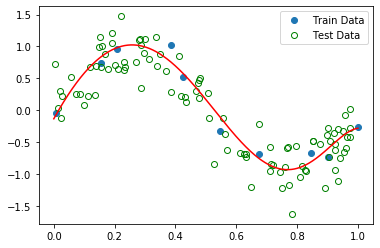

In [80]:
# (task 3) select the best model, print the rms error on testing data

feature_matrix_test = np.ones_like(x_test)
for i in range(1, 10):
    feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)
    
prediction_test = best_model.predict(feature_matrix_test)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))
print('rms error on testing data: ', rms_test)
 
# (task 4) drawing
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)
for i in range(1, 10):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)
    
y_curve = best_model.predict(features_curve)

plt.plot(x_train, y_train, marker='o', linestyle='None',label='Train Data') 
plt.plot(x_test, y_test, fillstyle='none', marker='o', color='g', linestyle='None',label='Test Data')
plt.legend(loc='upper right')
plt.plot(x_curve, y_curve, 'r')
plt.show()

--------------------<span style="color:red">12.5 points</span>--------------------<br>

#### Question 5. Does regularization alleviate over-fitting? Why? 

#### Your answer:


Yes. We can find that over-fitting problem will happen when $M$ is big. After regularization, the number of parameters, $M$, is also considered, which means a big $M$ will increase loss. So it alleviates over-fitting to certain extent.

--------------------<span style="color:red">13.5 points</span>--------------------<br>

### Part 3.3. Gradient descent practice
Choose a $\lambda$ as you like and set $M=9$, calculate and print its rms error on training, validation and testing data respectively, draw the function curve with all the training and testing data on it, based on **gradient descent algorithm**.

***Note***: the loss function is equation (4), when calculating the gradients, remember to also consider the regularizatin component.

loss:  [76.54400933]
loss:  [4.16468127]
loss:  [2.35741961]
loss:  [1.85145016]
loss:  [1.75702428]
Train RMS Error: 0.4472192115034671
Valid RMS Error: 0.5622614016979862
Test RMS Error: 0.9569617285730418


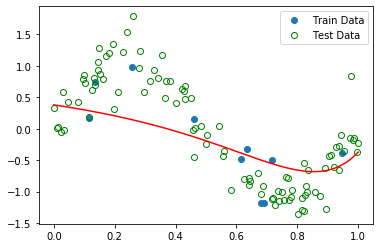

In [117]:
# your code here
# defining a learning rate
M = 9
learning_rate = 0.2
lmda = -25

# initialize the parameters
W = np.ones((M+1, 1))

# calculate the feature matrix as before, in order to compute the loss
feature_matrix = np.ones_like(x_train)
for i in range(1, M+1):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1) 

# iteratively do gradient descent
for i in range(50):
    # calculate the values of the polynomial function
    F = np.matmul(feature_matrix, W)

    # calculate the loss, print it every 10 iterations
    if i % 10 ==0:
        loss = 0.5 * np.sum((F - y_train) ** 2)+ math.exp(ln_lambda)/2*sum(W*W)
        print('loss: ', loss)
        
    
    # calcualte the gradients of the parameters, considering regularization
    G = np.mean((F - y_train) * feature_matrix, axis=0).reshape(-1, 1)

    # update parameters to a direction that makes the loss smaller
    W = W - learning_rate * G

# draw the figure and print all the information

# Calculate train RMS Error
prediction_train =  np.matmul(feature_matrix, W)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

# Calculate valid RMS Error
prediction_valid = np.matmul(feature_matrix_valid, W)
rms_valid = np.sqrt(np.sum((prediction_valid - y_extra) ** 2) / len(prediction_valid))

# Calculate test RMS Error
prediction_test = np.matmul(feature_matrix_test, W)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

# Print RMS Error
print('Train RMS Error:', rms_train)
print('Valid RMS Error:', rms_valid)
print('Test RMS Error:', rms_test)

x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)
for i in range(1, M+1):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

y_curve = np.matmul(features_curve, W)
plt.plot(x_train, y_train, marker='o', linestyle='None',label='Train Data') 
plt.plot(x_test, y_test, fillstyle='none', marker='o', color='g', linestyle='None',label='Test Data')
plt.legend(loc='upper right')
plt.plot(x_curve, y_curve, 'r')
plt.show()

--------------------<span style="color:red">15 points</span>--------------------<br>